In [2]:
import Pkg
Pkg.activate(".")
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics","ApproxFun"])

  Activating project at `~/Documents/programming/BME-502-2025`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [3]:
using Plots, Distributions, Random, Polynomials, Statistics, ApproxFun

$p_{posterior}$ is proportional to the posterior probability of alpha and beta given the observed data.  The model is that $logit(\theta)=\alpha+dose*\beta$, where theta is the probablity of death for the log drug concentration dose.

$$logit(p)=\log\left( \frac{p}{1-p} \right) =\log(p)-\log(1-p)=-\log\left( \frac{1}{p} - 1\right)$$

The $logit$ function is often used to stretch the value space of a variable that has a range from 0 to 1 (for example a probability).

As you can see below, for each dose the likelihood of the data to be observed $deaths_i$ given the probability of death $\theta_i$ and the number of tries $n_i$:

$$P( deaths_{i} \mid n_{i},\theta_{i}) \propto  \theta_{i}^{deaths_{i}}(1-\theta_{i})^{n_{i}-deaths_{i}}$$

The combined likelihood is the product of all experimental outcomes:

$$P( \{deaths_{i}\} \mid \{n_{i},\theta_{i}\}) \propto  \prod_{i}\theta_{i}^{deaths_{i}}(1-\theta_{i})^{n_{i}-deaths_{i}}$$

In order to use the function with alpha, beta being two-dimensional matrices and dose,obs_deaths and n being one-dimensional arrays, I was forced to interate over dose and then take the product over the first axis.  Let me know if there is an easier and more elegant way.

In [7]:
# experimental data for LD50 test
dose = [-0.86,-0.3,-0.05,0.73]
n = ones(4)*5
nd = [0,1,3,5]

4-element Vector{Int64}:
 0
 1
 3
 5

In [8]:
function invlogit(x)
    return exp(x)/(1+exp(x))
end

invlogit (generic function with 1 method)

In [9]:
function logit(p)
    return log(p/(1-p))
end

logit (generic function with 1 method)

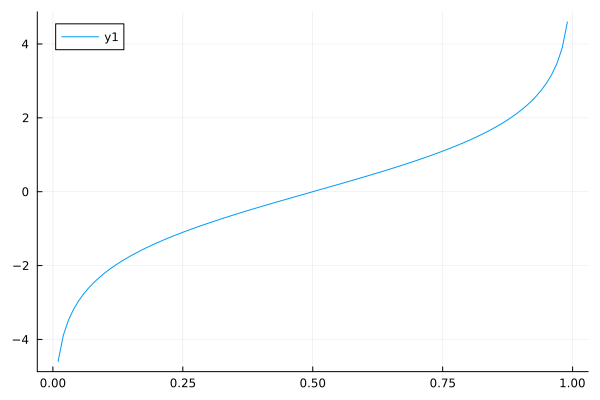

In [10]:
p_range = 0:0.01:1
plot(p_range,logit.(p_range))

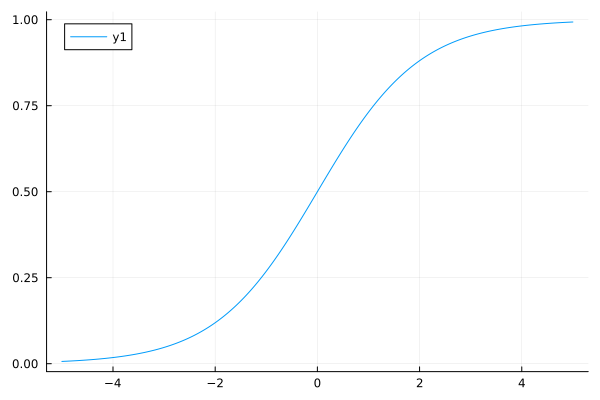

In [11]:
logit_range = -5:0.01:5
plot(logit_range,invlogit.(logit_range))

In [14]:
# trick how to iterate over several list together
for (item1,item2) in zip([2,5,6],[7,9,1])
    println(item1," ",item2)
end

2 7
5 9
6 1


In [16]:
collect(zip([2,5,6],[7,9,1]))

3-element Vector{Tuple{Int64, Int64}}:
 (2, 7)
 (5, 9)
 (6, 1)

In [17]:
function posterior(α, β, dose, deaths, n)
    p_list = []
    for (d,nd,nn) in zip(dose,deaths,n)
        θ = invlogit(α + β*d)
        push!(p_list, θ^nd * (1-θ)^(nn-nd))
    end
    return prod(p_list)
end

posterior (generic function with 1 method)

In [20]:
poster(α, β) = posterior(α, β, dose, nd, n)

poster (generic function with 1 method)

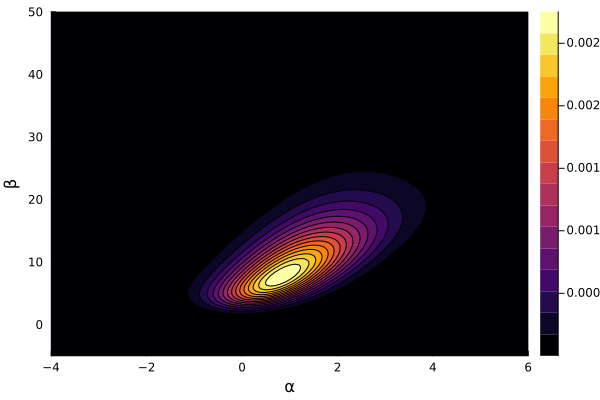

In [22]:
contourf(-4:0.1:6,-5:0.1:50, poster, xlabel="α",ylabel="β")